# intro

the analytic phase ansatz for the merger-ringdown
contains a hypergeometric function F21.
This is an extensive function and also
requires special treatment to ensure it
is computed with sufficient accuracy.

It would be much easier if we didn't have to
use the F21 function at late times
when the phase is well described by
a linear function.

This notebook looks at then can we make this
linear function approximation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import chirpy_mk1 as cmk1
from chirpy_mk1 import ansatz
import phenom

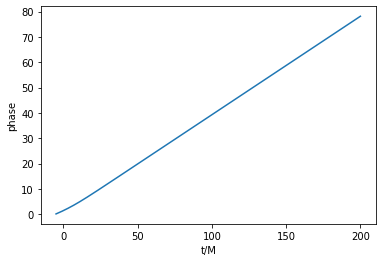

In [68]:
q = 30.
eta = phenom.eta_from_q(q)
times = np.linspace(-5, 200, 1000)

fin_spin = phenom.remnant.FinalSpin0815(eta, 0, 0)
fring = phenom.remnant.fring(eta, 0, 0, fin_spin)
# convert to angular geometric
fring *= 2*np.pi
fdamp = phenom.remnant.fdamp(eta, 0, 0, fin_spin)
# convert to angular geometric
fdamp *= 2*np.pi

params_freq_mrd={}
params_freq_mrd.update({
    't0': ansatz.PSF_freq_mrd('t0', eta),
    'om_f' : fring,
    'b' : 1./fdamp,
    'offset': 0.175,
    'kappa': 0.44
})

phase_mrd = ansatz.analytic_phase_mrd_ansatz(times, **params_freq_mrd)

#print('t\tmodel phase')
#for t,  mphase in list(zip(times,  phase_mrd)):
#    print('{}\t{:.16f}'.format(t, mphase))

plt.figure()
plt.plot(times, phase_mrd)
plt.xlabel('t/M')
plt.ylabel('phase')
plt.show()


In [69]:
freq_mrd = ansatz.freq_mrd_ansatz(times, params_freq_mrd)

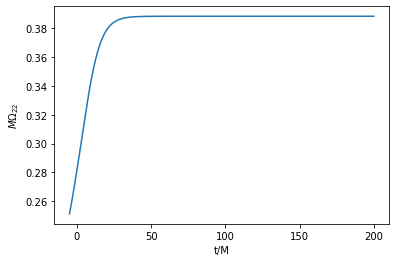

In [70]:
plt.figure()
plt.plot(times, freq_mrd)
plt.xlabel('t/M')
plt.ylabel(r'$M \Omega_{22}$')
plt.show()

In [71]:
def constant_continuation_freq(t, f, t0):
    t=t.copy()
    f=f.copy()
    mask = t >= t0
    
    f0 = f[mask][0]
    
    f[mask] = f0
    
    return t, f


In [72]:
t,f = constant_continuation_freq(times, freq_mrd, 40)

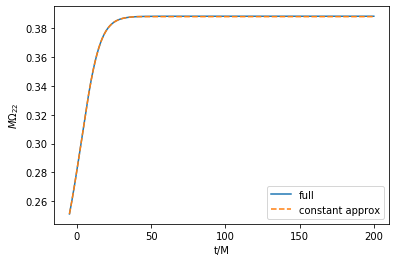

In [73]:
plt.figure()
plt.plot(times, freq_mrd, label='full')
plt.plot(t, f, ls='--', label='constant approx')
plt.xlabel('t/M')
plt.ylabel(r'$M \Omega_{22}$')
plt.legend()
plt.show()

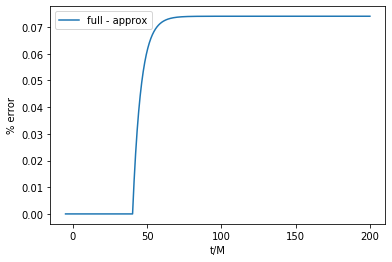

In [74]:
plt.figure()
plt.plot(times, 100*np.abs(freq_mrd - f)/freq_mrd, label='full - approx')
plt.xlabel('t/M')
plt.ylabel('% error')
# plt.yscale('log')
plt.legend()
plt.show()

In [149]:
def constant_continuation_phase(t, p, t0):
    t=t.copy()
    p=p.copy()
    
    dt = t[1]-t[0]
    
    mask = t >= t0
    
    p0 = p[mask][0]
    p1 = p[mask][1]
    
    dp = p1 - p0
    
    m = dp/dt
    
    c = p0 - m * t0
    
    p[mask] = t[mask] * m + c
    
    return t, p

In [163]:
t, p = constant_continuation_phase(times, phase_mrd, 40)

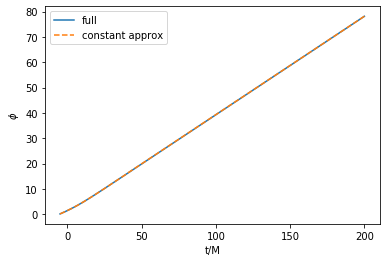

In [164]:
plt.figure()
plt.plot(times, phase_mrd, label='full')
plt.plot(t, p, ls='--', label='constant approx')
plt.xlabel('t/M')
plt.ylabel(r'$\phi$')
plt.legend()
plt.show()

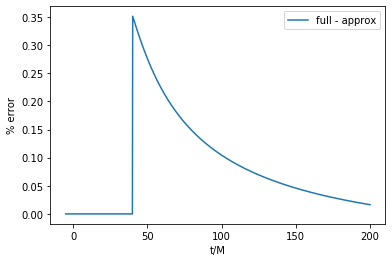

In [165]:
plt.figure()
plt.plot(times, 100*np.abs(phase_mrd - p)/phase_mrd, label='full - approx')
plt.xlabel('t/M')
plt.ylabel('% error')
# plt.yscale('log')
plt.legend()
plt.show()